# Data:
1. Quantitative (= numeric variable):
   - discreete
   - continuous
2. Qualitative (= categorical variable):
   - nominal
   - ordinal
  
https://www.abs.gov.au/statistics/understanding-statistics/statistical-terms-and-concepts/quantitative-and-qualitative-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/fb/xl0hnskx527bfqkv38l3sn7h0000gn/T/ipykernel_77000/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = np.random.randint(1,100,500000)

In [3]:
data_reshaped = data.reshape(100000, 5)

In [4]:
df = pd.DataFrame(data_reshaped)

In [5]:
df

,0,1,2,3,4
0,42,34,48,49,93
1,38,44,21,47,73
2,75,83,56,25,32
3,43,97,75,37,42
4,81,55,6,28,44
...,...,...,...,...,...
99995,10,8,75,73,54
99996,77,68,73,95,36
99997,99,49,6,6,40
99998,49,57,53,49,61


In [6]:
# rename columns
df.columns = ['Col'+str(col) if isinstance(col, int) else col for col in df.columns]

In [7]:
df

,Col0,Col1,Col2,Col3,Col4
0,42,34,48,49,93
1,38,44,21,47,73
2,75,83,56,25,32
3,43,97,75,37,42
4,81,55,6,28,44
...,...,...,...,...,...
99995,10,8,75,73,54
99996,77,68,73,95,36
99997,99,49,6,6,40
99998,49,57,53,49,61


In [8]:
for var in df.columns:
    #var = 'Col1'
    conditions = [(df[var] >= 0) & (df[var] < 10),
                  (df[var] >= 10) & (df[var] < 20),
                  (df[var] >= 20) & (df[var] < 30),
                  (df[var] >= 30) & (df[var] < 40),
                  (df[var] >= 40) & (df[var] < 50),
                  (df[var] >= 50) & (df[var] < 60),
                  (df[var] >= 60) & (df[var] < 70),
                  (df[var] >= 70) & (df[var] < 80),
                  (df[var] >= 80) & (df[var] < 90),
                  (df[var] >= 90) & (df[var] < 100)]
    results = ['0-9 let','10-19 let','20-29 let','30-39 let','40-49 let',
               '50-59 let','60-69 let','70-79 let','80-89 let','90-99 let']
    df[var+'_bin'] = np.select(condlist=conditions, choicelist=results, default='ERROR')

In [9]:
df

,Col0,Col1,Col2,Col3,Col4,Col0_bin,Col1_bin,Col2_bin,Col3_bin,Col4_bin
0,42,34,48,49,93,40-49 let,30-39 let,40-49 let,40-49 let,90-99 let
1,38,44,21,47,73,30-39 let,40-49 let,20-29 let,40-49 let,70-79 let
2,75,83,56,25,32,70-79 let,80-89 let,50-59 let,20-29 let,30-39 let
3,43,97,75,37,42,40-49 let,90-99 let,70-79 let,30-39 let,40-49 let
4,81,55,6,28,44,80-89 let,50-59 let,0-9 let,20-29 let,40-49 let
...,...,...,...,...,...,...,...,...,...,...
99995,10,8,75,73,54,10-19 let,0-9 let,70-79 let,70-79 let,50-59 let
99996,77,68,73,95,36,70-79 let,60-69 let,70-79 let,90-99 let,30-39 let
99997,99,49,6,6,40,90-99 let,40-49 let,0-9 let,0-9 let,40-49 let
99998,49,57,53,49,61,40-49 let,50-59 let,50-59 let,40-49 let,60-69 let


In [10]:
assert len(df[df.eq('ERROR').any(axis = 1)]) == 0

In [11]:
df['Count'] = 1

In [12]:
df1 = df[['Col0_bin', 'Count']].groupby(by = 'Col0_bin').count()

In [13]:
df1

,Count
Col0_bin,
0-9 let,9132
10-19 let,9919
20-29 let,10133
30-39 let,10098
40-49 let,10126
50-59 let,10010
60-69 let,10248
70-79 let,10110
80-89 let,10148


In [14]:
df2 = df1.cumsum(axis = 0)

In [15]:
df2

,Count
Col0_bin,
0-9 let,9132
10-19 let,19051
20-29 let,29184
30-39 let,39282
40-49 let,49408
50-59 let,59418
60-69 let,69666
70-79 let,79776
80-89 let,89924


<Axes: title={'center': 'Cumulative counts'}, xlabel='Col0_bin'>

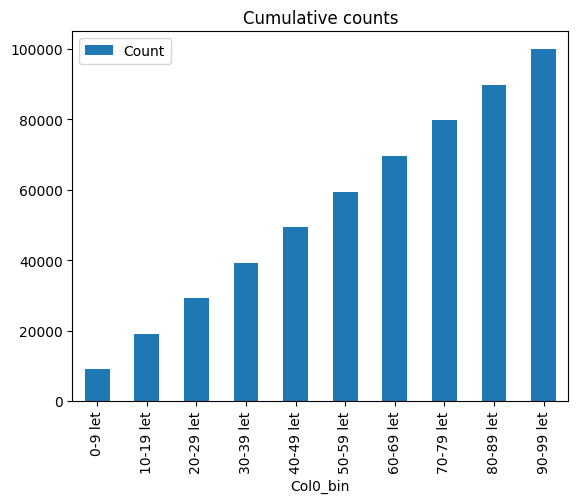

In [16]:
df2.plot.bar(title = 'Cumulative counts')

In [17]:
labels = df2.index.to_numpy()
labels

array(['0-9 let', '10-19 let', '20-29 let', '30-39 let', '40-49 let',
       '50-59 let', '60-69 let', '70-79 let', '80-89 let', '90-99 let'],
      dtype=object)

In [18]:
values = df2['Count'].to_numpy()
values

array([  9132,  19051,  29184,  39282,  49408,  59418,  69666,  79776,
        89924, 100000])

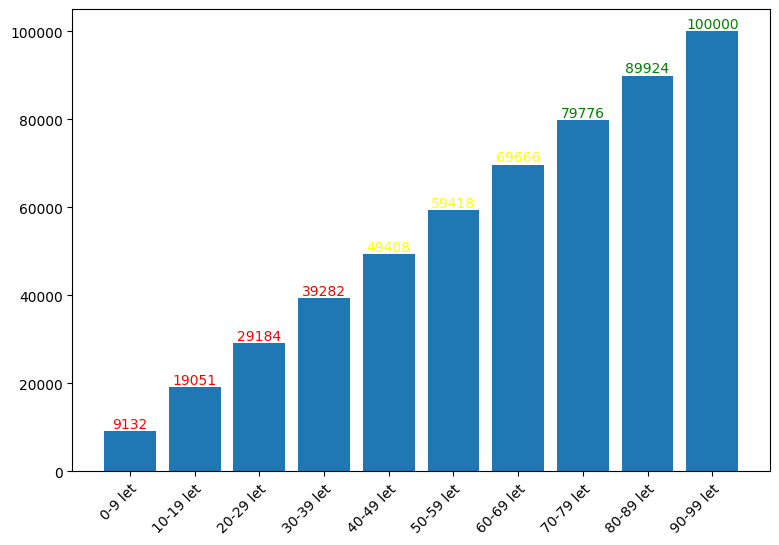

In [19]:
fig, ax = plt.subplots(figsize = (9, 6))
rects = ax.bar(range(len(labels)), values)
[ax.annotate(xy = (r.get_x() + r.get_width()/2, r.get_height()), text = r.get_height(), ha = 'center', va = 'bottom', color = 'red' if r.get_height() < 40000 else 'yellow' if r.get_height() < 70000 else 'green') for r in rects]
plt.xticks(range(len(labels)), labels, ha = 'right', rotation = 45, rotation_mode = 'anchor')
plt.show()

In [20]:
[(r.get_height(), r.get_x(), r.get_width()) for r in rects]

[(9132, -0.4, 0.8),
 (19051, 0.6, 0.8),
 (29184, 1.6, 0.8),
 (39282, 2.6, 0.8),
 (49408, 3.6, 0.8),
 (59418, 4.6, 0.8),
 (69666, 5.6, 0.8),
 (79776, 6.6, 0.8),
 (89924, 7.6, 0.8),
 (100000, 8.6, 0.8)]

In [23]:
dir(rects[0])

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiased',
 '_aspect_ratio_correction',
 '_axes',
 '_callbacks',
 '_capstyle',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_convert_units',
 '_convert_xy_units',
 '_dash_pattern',
 '_different_canvas',
 '_draw_paths_with_artist_properties',
 '_edge_default',
 '_edgecolor',
 '_facecolor',
 '_fill',
 '_fully_clipped_to_axes',
 '_gid',
 '_hatch',
 '_hatch_color',
 '_height',
 '_in_layout',
 '_internal_update',
 '_joinstyle',
 '_label',
 '_linestyle',
 '_linewidth',
 '_mouseover',
 '_original_edgecolor',
 '_original_fac

In [24]:
def getPieChart(values, labels):
    fig, ax = plt.subplots(figsize = (6,6))
    plt.pie(x = values, labels = labels, autopct = "%1.2f%%", counterclock = False, startangle = -270)
    plt.show()

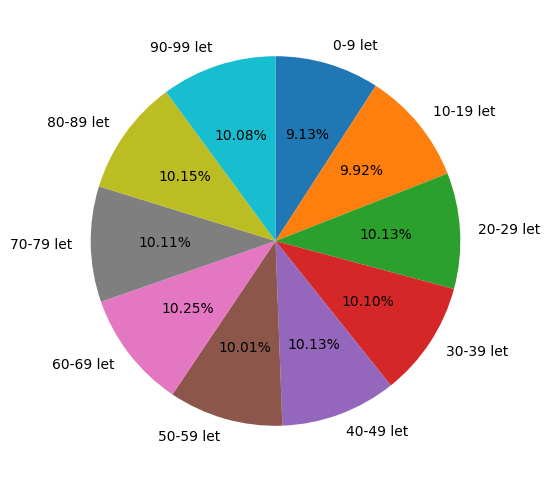

In [25]:
labels = df1.index.to_numpy()
values = df1['Count'].to_numpy()
getPieChart(values, labels)

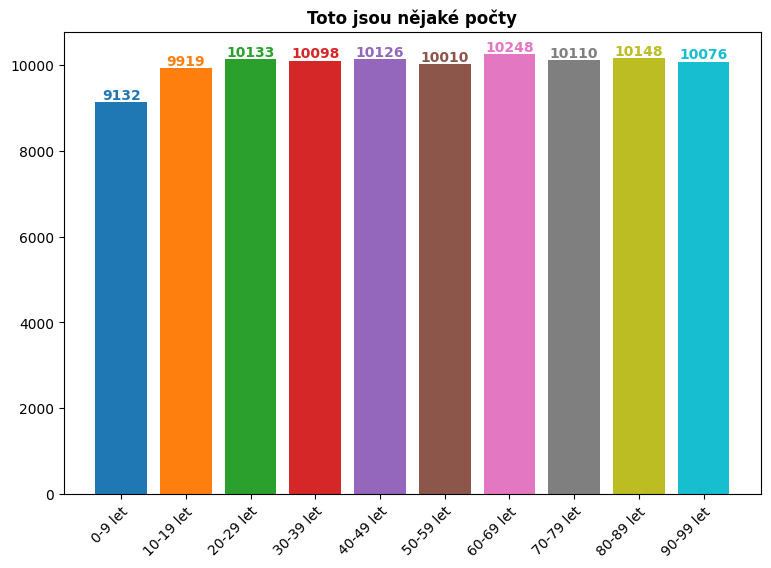

In [26]:
import matplotlib as mpl
cmap = mpl.colormaps['tab10']
colors = cmap(np.linspace(0, 1, len(labels)))

fig, ax = plt.subplots(figsize = (9, 6))
rects = ax.bar(range(len(labels)), values)
[ax.annotate(xy = (r.get_x() + r.get_width()/2, r.get_height()), text = r.get_height(), ha = 'center', va = 'bottom', color = colors[i], weight = 'bold') for i, r in enumerate(rects)]
[ax.bar(x = r.get_x() + r.get_width()/2, height = r.get_height(), color = colors[i], width = r.get_width()) for i, r in enumerate(rects)]
plt.xticks(range(len(labels)), labels, ha = 'right', rotation = 45, rotation_mode = 'anchor')
plt.title(label = 'Toto jsou nějaké počty', weight = 'bold')
plt.show()

In [27]:
colors

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.54901961, 0.3372549 , 0.29411765, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.49803922, 0.49803922, 0.49803922, 1.        ],
       [0.7372549 , 0.74117647, 0.13333333, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ]])